**Motivación del análisis**

En el contexto actual de la medicina preventiva, las compañías de salud buscan reducir los riesgos asociados a enfermedades crónicas mediante intervenciones tempranas. Una de las conductas con mayor impacto negativo en la salud es el tabaquismo, asociado a enfermedades cardiovasculares, respiratorias y metabólicas.

**Pregunta guía del análisis**

Para responder esta pregunta, se analizarán variables demográficas, biométricas y de salud bucal de más de 55.000 personas. Se busca identificar patrones y combinaciones de variables que permitan predecir la probabilidad de tabaquismo.

**Descripción de variables**

ID: Identificador único para cada persona.
Tipo: Categórica nominal (ID).

gender: Género del individuo (0 = Femenino, 1 = Masculino).
Tipo: Categórica binaria.

age: Edad de la persona (en años).
Tipo: Numérica discreta (ordinal).

height(cm): Altura corporal en centímetros.
Tipo: Numérica continua de razón.

weight(kg): Peso corporal en kilogramos.
Tipo: Numérica continua de razón.

waist(cm): Circunferencia de cintura en centímetros.
Tipo: Numérica continua de razón.

eyesight(left): Agudeza visual del ojo izquierdo.
Tipo: Numérica continua de razón.

eyesight(right): Agudeza visual del ojo derecho.
Tipo: Numérica continua de razón.

hearing(left): Estado auditivo del oído izquierdo (0 = Normal, 1 = Alterado).
Tipo: Categórica binaria.

hearing(right): Estado auditivo del oído derecho (0 = Normal, 1 = Alterado).
Tipo: Categórica binaria.

systolic: Presión arterial sistólica (mmHg).
Tipo: Numérica continua de razón.

relaxation: Presión arterial diastólica (mmHg).
Tipo: Numérica continua de razón.

fasting blood sugar: Nivel de glucosa en sangre en ayunas.
Tipo: Numérica continua de razón.

Cholesterol: Colesterol total en sangre (mg/dL).
Tipo: Numérica continua de razón.

triglyceride: Niveles de triglicéridos en sangre.
Tipo: Numérica continua de razón.

HDL: Colesterol HDL (colesterol “bueno”).
Tipo: Numérica continua de razón.

LDL: Colesterol LDL (colesterol “malo”).
Tipo: Numérica continua de razón.

hemoglobin: Nivel de hemoglobina en sangre.
Tipo: Numérica continua de razón.

Urine protein: Nivel de proteína en orina (1 = Normal, >1 = Anormal).
Tipo: Numérica discreta (ordinal).

serum creatinine: Nivel de creatinina sérica.
Tipo: Numérica continua de razón.

AST: Enzima hepática aspartato aminotransferasa.
Tipo: Numérica continua de razón.

ALT: Enzima hepática alanina aminotransferasa.
Tipo: Numérica continua de razón.

Gtp: Enzima hepática gamma-glutamil transpeptidasa.
Tipo: Numérica continua de razón.

oral: Registro de examen oral realizado (0 = No, 1 = Sí).
Tipo: Categórica binaria.

dental caries: Presencia de caries dentales (0 = No, 1 = Sí).
Tipo: Categórica binaria.

tartar: Presencia de sarro dental (0 = No, 1 = Sí).
Tipo: Categórica binaria.

smoking: Indica si la persona fuma o no (0 = No, 1 = Sí).
Tipo: Categórica binaria.
Nota: Variable objetivo.

In [ ]:
# Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cargamos el dataset
df = pd.read_csv('/content/7_smoking_prediction')

In [ ]:
# Verificar la forma del DataFrame: cantidad de filas y columnas
df.shape

(55692, 27)

In [ ]:
# Mostrar las primeras 5 filas del dataset para una vista general
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1,1,...,12.9,1,0.7,18,19,27,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1,1,...,12.7,1,0.6,22,19,18,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1,1,...,15.8,1,1.0,21,16,22,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1,1,...,14.7,1,1.0,19,26,18,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1,1,...,12.5,1,0.6,16,14,22,Y,0,N,0


In [ ]:
# Obtener información general sobre el dataset:
# tipos de datos, cantidad de valores no nulos por columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  int64  
 9   hearing(right)       55692 non-null  int64  
 10  systolic             55692 non-null  int64  
 11  relaxation           55692 non-null  int64  
 12  fasting blood sugar  55692 non-null  int64  
 13  Cholesterol          55692 non-null  int64  
 14  triglyceride         55692 non-null  int64  
 15  HDL                  55692 non-null 

In [ ]:
# Contar la cantidad de valores nulos por columna
# Esto es clave para detectar posibles problemas de calidad de datos
df.isnull().sum()

,0
ID,0
gender,0
age,0
height(cm),0
weight(kg),0
waist(cm),0
eyesight(left),0
eyesight(right),0
hearing(left),0
hearing(right),0


In [ ]:
# Resumen estadístico de todas las variables numéricas
# Incluye: media, desvío, min, max y cuartiles
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,55692.0,27845.500000,16077.039933,0.0,13922.75,27845.5,41768.25,55691.0
age,55692.0,44.182917,12.071418,20.0,40.00,40.0,55.00,85.0
height(cm),55692.0,164.649321,9.194597,130.0,160.00,165.0,170.00,190.0
weight(kg),55692.0,65.864936,12.820306,30.0,55.00,65.0,75.00,135.0
waist(cm),55692.0,82.046418,9.274223,51.0,76.00,82.0,88.00,129.0
eyesight(left),55692.0,1.012623,0.486873,0.1,0.80,1.0,1.20,9.9
eyesight(right),55692.0,1.007443,0.485964,0.1,0.80,1.0,1.20,9.9
hearing(left),55692.0,1.025587,0.157902,1.0,1.00,1.0,1.00,2.0
hearing(right),55692.0,1.026144,0.159564,1.0,1.00,1.0,1.00,2.0
systolic,55692.0,121.494218,13.675989,71.0,112.00,120.0,130.00,240.0


In [ ]:
# Copia de trabajo
df_clean = df.copy()

# Mapear valores categóricos binarios
df_clean['oral'] = df_clean['oral'].map({'Y': 1, 'N': 0})
df_clean['tartar'] = df_clean['tartar'].map({'Y': 1, 'N': 0})
df_clean['gender'] = df_clean['gender'].map({'M': 1, 'F': 0})

# Reescalar las columnas de audición: 1 = normal → 0, 2 = pérdida → 1
df_clean['hearing(left)'] = df_clean['hearing(left)'].map({1: 0, 2: 1})
df_clean['hearing(right)'] = df_clean['hearing(right)'].map({1: 0, 2: 1})

In [ ]:
# Verificamos que se hayan aplicado correctamente
df_clean[['gender', 'oral', 'tartar', 'hearing(left)', 'hearing(right)']].head()

,gender,oral,tartar,hearing(left),hearing(right)
0,0,1,1,0,0
1,0,1,1,0,0
2,1,1,0,0,0
3,1,1,1,0,0
4,0,1,0,0,0


In [ ]:
# Confirmar que no quedan columnas tipo object que deberían ser numéricas
df_clean.dtypes.value_counts()

,count
int64,22
float64,5


In [ ]:
df_clean.drop(columns=['ID'], inplace=True)

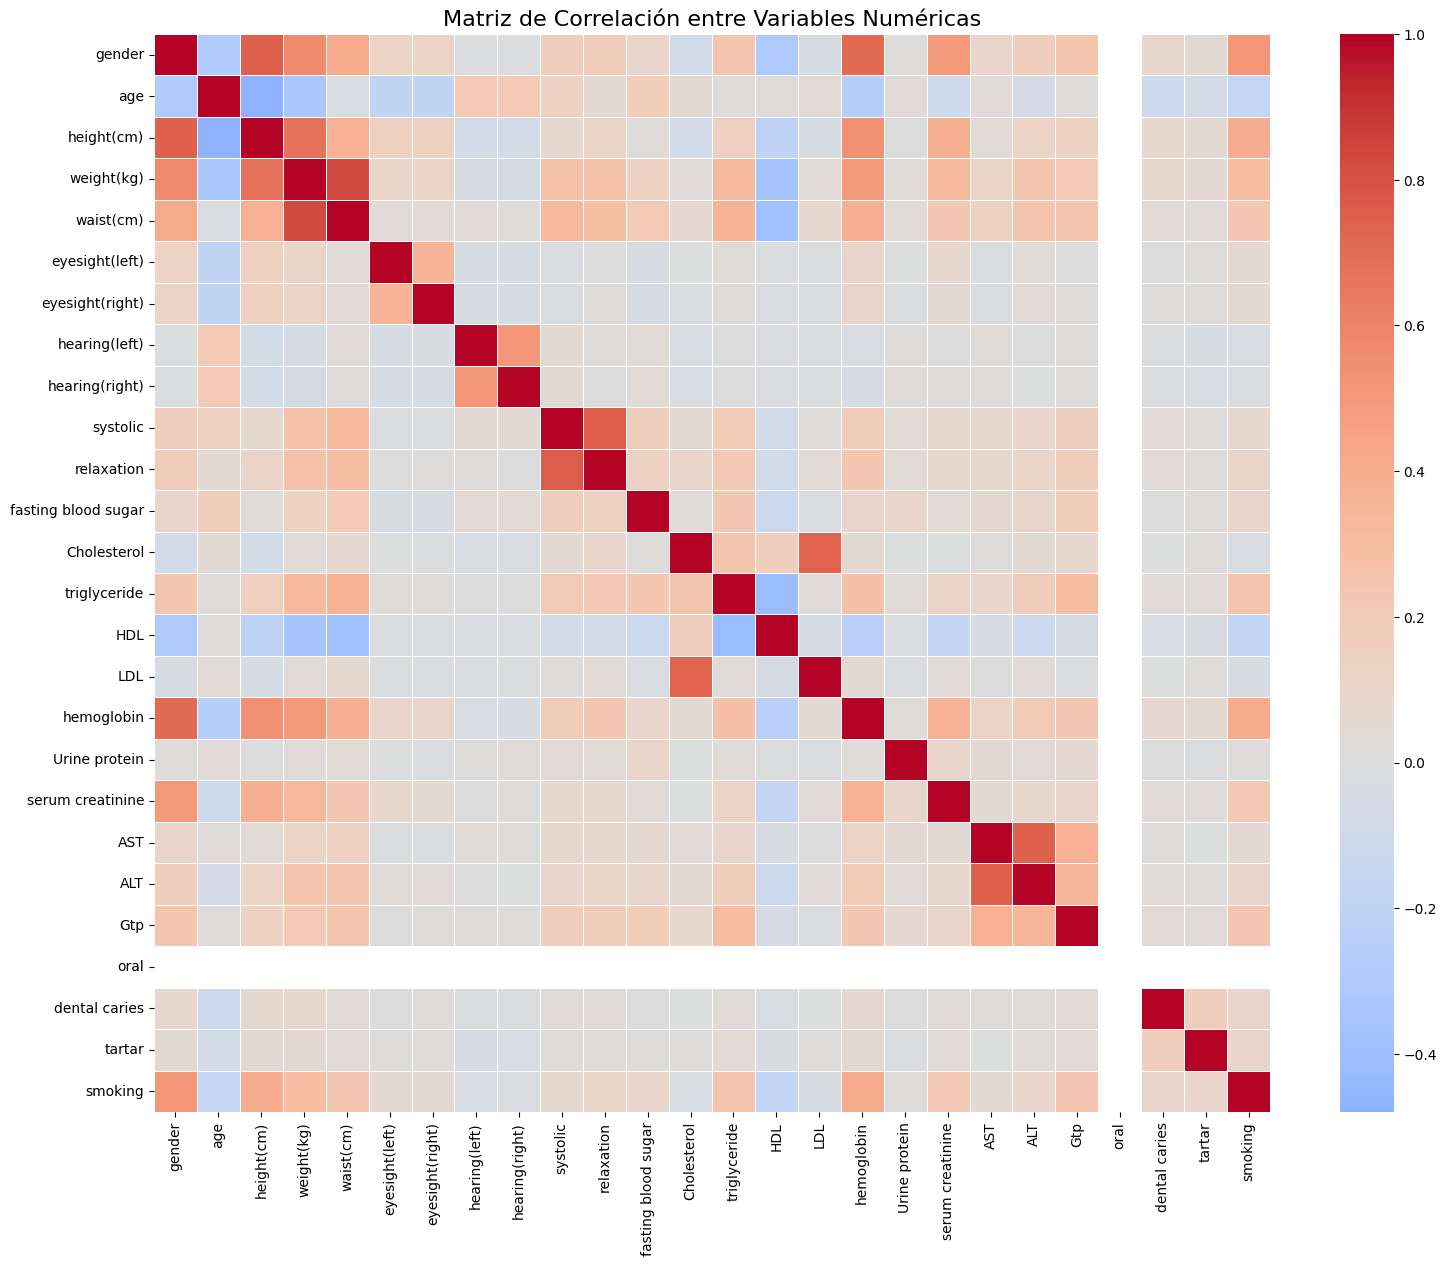

In [ ]:
# Calcular la matriz de correlación solo para variables numéricas
corr = df_clean.corr(numeric_only=True)

# Visualización con heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(corr, cmap='coolwarm', annot=False, linewidths=0.5, center=0)
plt.title('Matriz de Correlación entre Variables Numéricas', fontsize=16)
plt.show()

/tmp/ipython-input-2783587162.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoking', data=df_clean, palette='Set2')


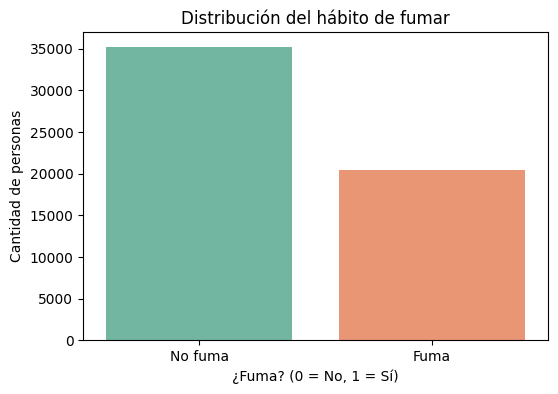

Porcentaje de personas que fuman: 36.73%


In [ ]:
# Gráfico de barras de la variable 'smoking'
# Este gráfico muestra cuántas personas fuman (1) y cuántas no (0)
plt.figure(figsize=(6, 4))
sns.countplot(x='smoking', data=df_clean, palette='Set2')
plt.title('Distribución del hábito de fumar')
plt.xlabel('¿Fuma? (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de personas')
plt.xticks([0, 1], ['No fuma', 'Fuma'])
plt.show()

# Porcentaje
porcentaje_fumadores = df_clean['smoking'].mean() * 100
print(f"Porcentaje de personas que fuman: {porcentaje_fumadores:.2f}%")

Conclusión: La mayoría de las personas no fuman, aunque hay una proporción considerable de fumadores (37%).

/tmp/ipython-input-396007693.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df_clean, palette='pastel')


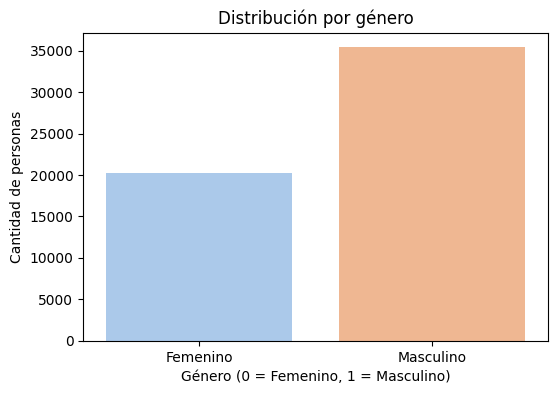

In [ ]:
# Gráfico de barras para ver la distribución por género
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df_clean, palette='pastel')
plt.title('Distribución por género')
plt.xlabel('Género (0 = Femenino, 1 = Masculino)')
plt.ylabel('Cantidad de personas')
plt.xticks([0, 1], ['Femenino', 'Masculino'])
plt.show()

**Conclusión:** Hay más hombres que mujeres en el dataset.

/tmp/ipython-input-675842846.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0], x='oral', data=df_clean, palette='Set3')
/tmp/ipython-input-675842846.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1], x='tartar', data=df_clean, palette='Set3')


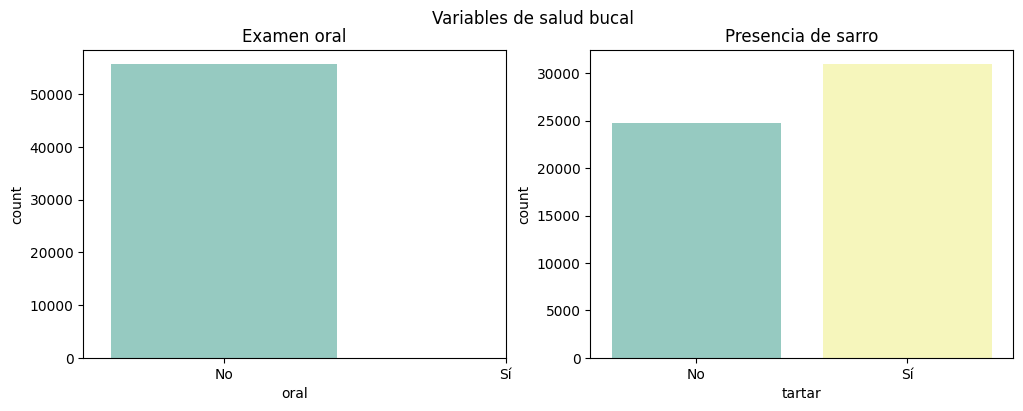

In [ ]:
# Gráficos de barras para variables relacionadas con salud bucal
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Examen oral
sns.countplot(ax=axes[0], x='oral', data=df_clean, palette='Set3')
axes[0].set_title('Examen oral')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No', 'Sí'])

# Presencia de sarro
sns.countplot(ax=axes[1], x='tartar', data=df_clean, palette='Set3')
axes[1].set_title('Presencia de sarro')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No', 'Sí'])

plt.suptitle('Variables de salud bucal')
plt.show()

**Conclusión:** La mayoría tuvo examen oral, pero la presencia de sarro es común. Esta última puede relacionarse con el hábito de fumar.

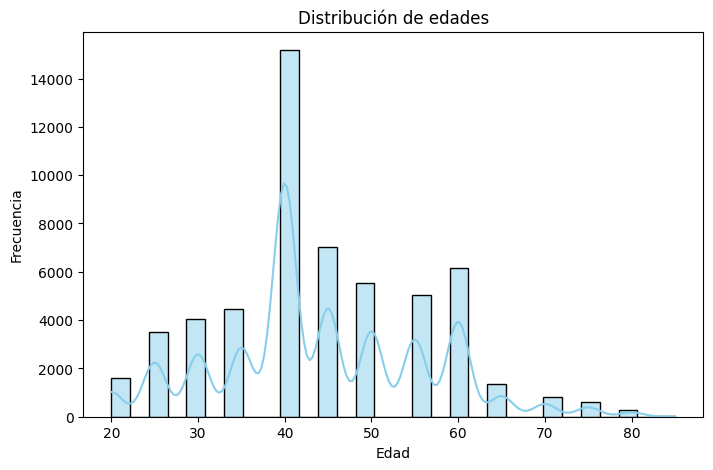

In [ ]:
# Histograma de edades con curva de densidad
plt.figure(figsize=(8, 5))
sns.histplot(df_clean['age'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

**Conclusión:** El grupo predominante está en los 40 años. Esto puede afectar el análisis si no hay diversidad etaria suficiente.

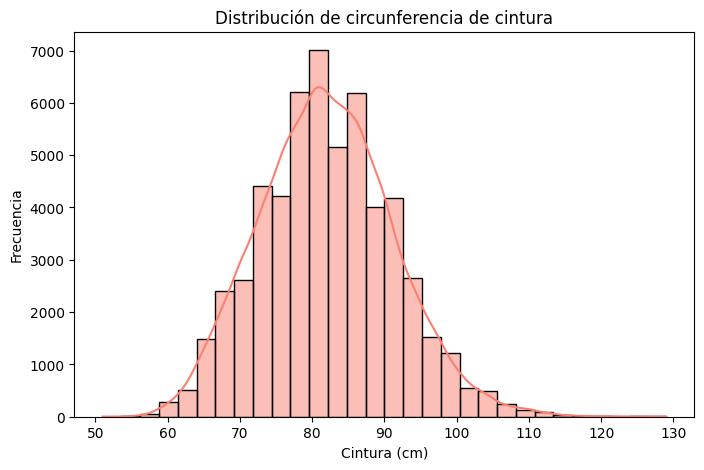

In [ ]:
# Histograma de cintura
plt.figure(figsize=(8, 5))
sns.histplot(df_clean['waist(cm)'], bins=30, kde=True, color='salmon')
plt.title('Distribución de circunferencia de cintura')
plt.xlabel('Cintura (cm)')
plt.ylabel('Frecuencia')
plt.show()

**Conclusión:** La distribución es normal, centrada entre 75 y 90 cm. Podría ser relevante para estudiar obesidad y tabaquismo.

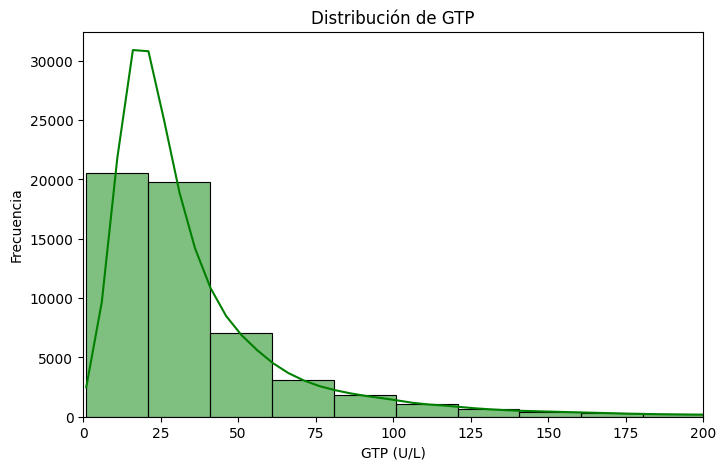

In [ ]:
# Histograma de valores de GTP (enzima hepática)
plt.figure(figsize=(8, 5))
sns.histplot(df_clean['Gtp'], bins=50, kde=True, color='green')
plt.title('Distribución de GTP')
plt.xlabel('GTP (U/L)')
plt.ylabel('Frecuencia')
plt.xlim(0, 200)  # limitar eje X para evitar outliers extremos
plt.show()

**Conclusión:** La mayoría tiene valores bajos, pero hay muchos outliers. GTP podría ser un buen predictor.

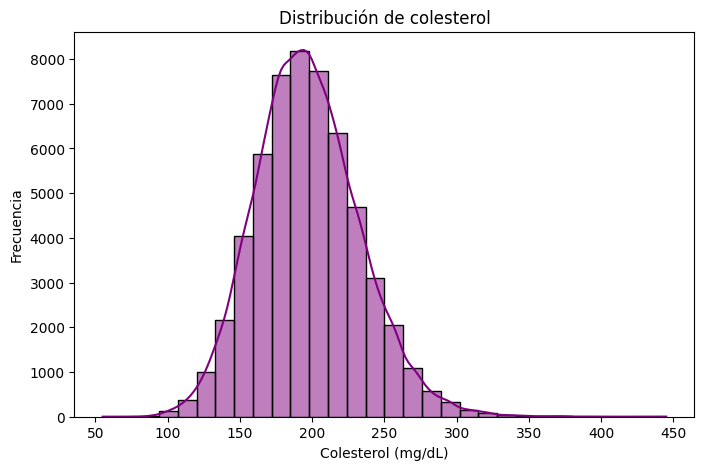

In [ ]:
# Histograma de colesterol total
plt.figure(figsize=(8, 5))
sns.histplot(df_clean['Cholesterol'], bins=30, kde=True, color='purple')
plt.title('Distribución de colesterol')
plt.xlabel('Colesterol (mg/dL)')
plt.ylabel('Frecuencia')
plt.show()

**Conclusión:** Distribución normal. Útil para análisis clínico, aunque no parece diferenciar a fumadores.

/tmp/ipython-input-857753074.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='gender', y='smoking', data=df_clean, ci=None, palette='pastel')
/tmp/ipython-input-857753074.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='smoking', data=df_clean, ci=None, palette='pastel')


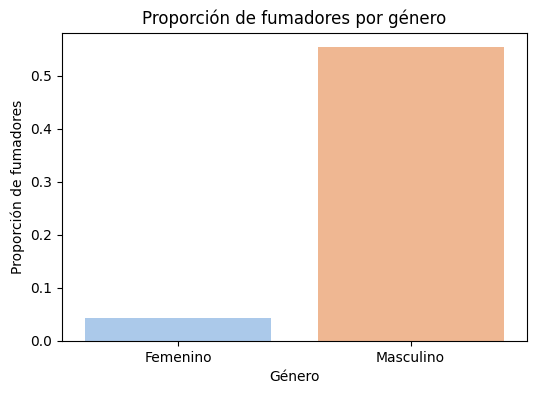

In [ ]:
# Gráfico de barras para comparar la proporción de fumadores entre hombres y mujeres
# La variable 'gender' es categórica (0 = mujer, 1 = hombre) y 'smoking' es binaria (0 = no fuma, 1 = fuma)
plt.figure(figsize=(6, 4))
sns.barplot(x='gender', y='smoking', data=df_clean, ci=None, palette='pastel')
plt.xticks([0, 1], ['Femenino', 'Masculino'])
plt.title('Proporción de fumadores por género')
plt.xlabel('Género')
plt.ylabel('Proporción de fumadores')
plt.show()

**Conclusión:** Se observa que los hombres tienen una proporción significativamente mayor de fumadores que las mujeres. El género es una variable altamente relevante para predecir el tabaquismo.

/tmp/ipython-input-3309674211.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='tartar', y='smoking', data=df_clean, ci=None, palette='Set3')
/tmp/ipython-input-3309674211.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tartar', y='smoking', data=df_clean, ci=None, palette='Set3')


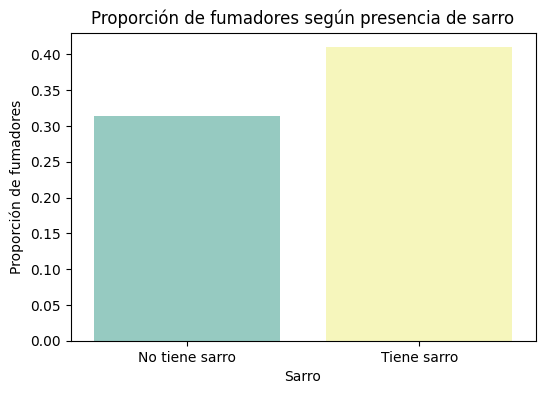

In [ ]:
# Gráfico de barras para visualizar la proporción de fumadores según presencia de sarro dental
# La variable 'tartar' es categórica binaria (0 = no, 1 = sí)
plt.figure(figsize=(6, 4))
sns.barplot(x='tartar', y='smoking', data=df_clean, ci=None, palette='Set3')
plt.xticks([0, 1], ['No tiene sarro', 'Tiene sarro'])
plt.title('Proporción de fumadores según presencia de sarro')
plt.xlabel('Sarro')
plt.ylabel('Proporción de fumadores')
plt.show()

**Conclusión:** Quienes presentan sarro tienen una mayor proporción de fumadores. Esto sugiere que el tabaquismo podría estar afectando la salud bucal.

/tmp/ipython-input-3239598914.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoking', y='age', data=df_clean, palette='coolwarm')


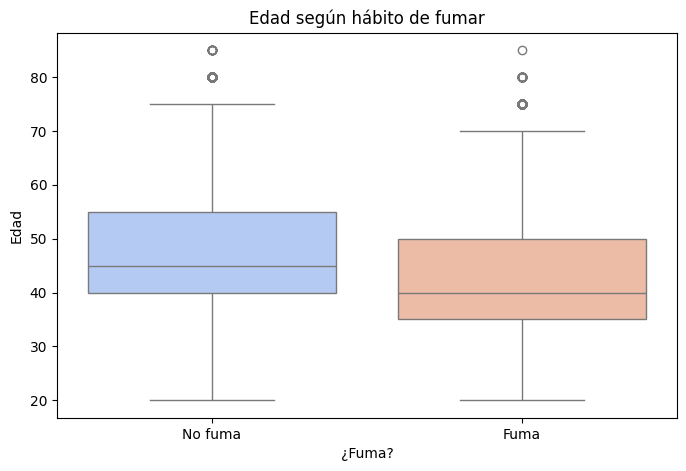

In [ ]:
# Gráfico de boxplot para comparar la edad entre fumadores y no fumadores
# Muestra la mediana, los cuartiles y posibles outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x='smoking', y='age', data=df_clean, palette='coolwarm')
plt.xticks([0, 1], ['No fuma', 'Fuma'])
plt.title('Edad según hábito de fumar')
plt.xlabel('¿Fuma?')
plt.ylabel('Edad')
plt.show()

**Conclusión:** Las personas que fuman tienden a ser más jóvenes que las que no fuman. La edad se perfila como un predictor inverso del tabaquismo.

/tmp/ipython-input-3487357756.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoking', y='waist(cm)', data=df_clean, palette='Set2')


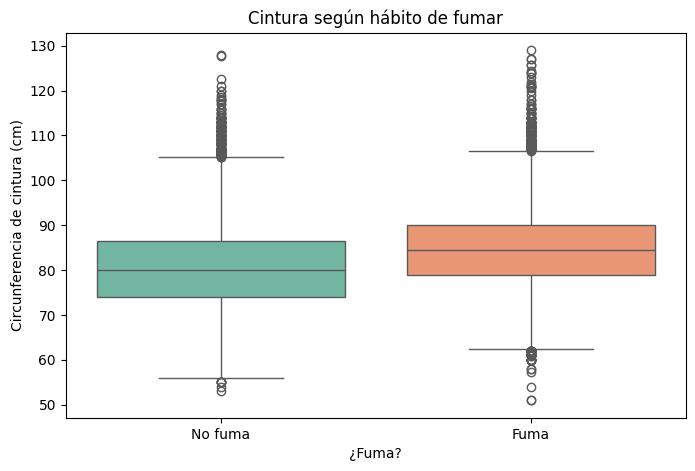

In [ ]:
# Boxplot para analizar la circunferencia de cintura entre fumadores y no fumadores
plt.figure(figsize=(8, 5))
sns.boxplot(x='smoking', y='waist(cm)', data=df_clean, palette='Set2')
plt.xticks([0, 1], ['No fuma', 'Fuma'])
plt.title('Cintura según hábito de fumar')
plt.xlabel('¿Fuma?')
plt.ylabel('Circunferencia de cintura (cm)')
plt.show()

**Conclusión:** Aunque la diferencia no es muy marcada, los fumadores tienden a tener una cintura ligeramente mayor, lo que podría vincularse con hábitos menos saludables.

/tmp/ipython-input-1053939475.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoking', y='Gtp', data=df_clean, palette='Set1')


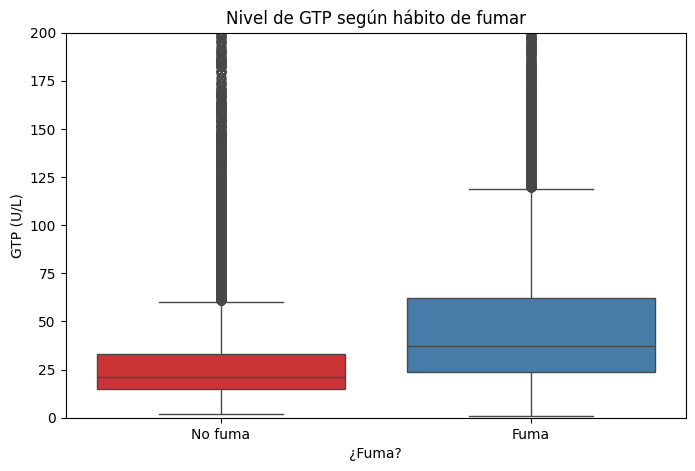

In [ ]:
# Boxplot para visualizar los niveles de GTP en fumadores vs no fumadores
# GTP es una enzima hepática sensible a factores como el alcohol o el tabaco
plt.figure(figsize=(8, 5))
sns.boxplot(x='smoking', y='Gtp', data=df_clean, palette='Set1')
plt.xticks([0, 1], ['No fuma', 'Fuma'])
plt.title('Nivel de GTP según hábito de fumar')
plt.xlabel('¿Fuma?')
plt.ylabel('GTP (U/L)')
plt.ylim(0, 200)  # recorte visual para evitar outliers extremos
plt.show()

**Conclusión:** Los fumadores presentan niveles notablemente más altos de GTP, lo cual puede reflejar un impacto negativo del tabaquismo en la función hepática.

/tmp/ipython-input-1044167423.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoking', y='Cholesterol', data=df_clean, palette='Purples')


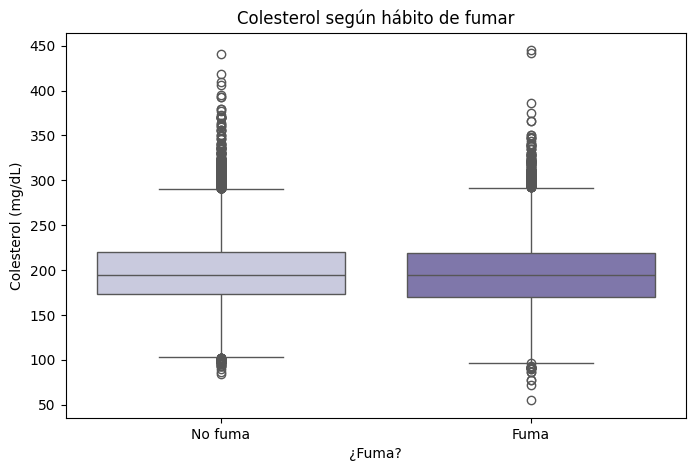

In [ ]:
# Boxplot para comparar los niveles de colesterol total entre fumadores y no fumadores
plt.figure(figsize=(8, 5))
sns.boxplot(x='smoking', y='Cholesterol', data=df_clean, palette='Purples')
plt.xticks([0, 1], ['No fuma', 'Fuma'])
plt.title('Colesterol según hábito de fumar')
plt.xlabel('¿Fuma?')
plt.ylabel('Colesterol (mg/dL)')
plt.show()

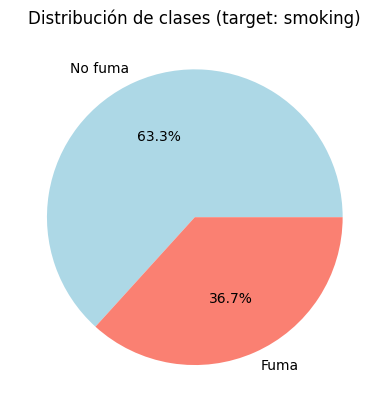

In [ ]:
df_clean['smoking'].value_counts().plot.pie(autopct='%1.1f%%', labels=['No fuma', 'Fuma'], colors=['lightblue', 'salmon'])
plt.title('Distribución de clases (target: smoking)')
plt.ylabel('')
plt.show()

**Conclusión:** No se observa una diferencia clara en los niveles de colesterol entre los grupos. Esta variable no parece estar asociada directamente con el hábito de fumar en esta muestra.

**Conclusión general:**

A partir del análisis exploratorio realizado, tanto univariado como bivariado, se identificaron patrones relevantes asociados al hábito de fumar dentro del dataset. En primer lugar, se observó que aproximadamente un 37% de las personas son fumadoras, lo que representa una proporción significativa en términos de salud pública y modelado.

El análisis por género evidenció que los hombres fuman considerablemente más que las mujeres, posicionando al género como una variable categórica clave a considerar en etapas posteriores del estudio. Del mismo modo, la edad mostró una tendencia inversa, con una mayor proporción de fumadores en grupos etarios más jóvenes, lo cual refuerza la idea de que el tabaquismo puede ser un comportamiento más frecuente en etapas tempranas de la vida adulta.

Desde el punto de vista clínico, las variables fisiológicas también revelaron asociaciones interesantes. El nivel de la enzima hepática GTP fue notablemente más alto en personas fumadoras, lo que puede estar vinculado con daños hepáticos asociados al consumo de tabaco. Asimismo, se encontró una ligera tendencia a mayor circunferencia de cintura en fumadores, aunque esta relación no fue tan marcada como otras.

En el área de salud bucal, la variable "tartar" (presencia de sarro) mostró una correlación clara: las personas con sarro tienen una mayor proporción de fumadores, lo cual es consistente con las consecuencias del tabaquismo en la higiene oral. En cambio, variables como el colesterol no mostraron diferencias significativas entre fumadores y no fumadores, por lo que su aporte predictivo podría ser limitado y hasta nulo.

Finalmente, algunas variables como "oral" (presencia de examen oral) mostraron una distribución uniforme sin variabilidad significativa, por lo que podrían ser descartadas en fases posteriores del análisis.